# Assignment 3 - Supervised Learning

## Nathan Inkawhich
Netid:  nai2

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1-e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model paramters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial dervatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear seperable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration of the algorithm. Divide you data into a training and testing set where the test set accounts for 30 percent of the data and the test set the remaining 70 percent. In doing this you'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to?
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient?
3. Stopping criteria - when should the algorithm be finished searching for the optimum?

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different initializations, learning rates, and stopping criteria. What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why?

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing as well as using linear regression. Show ROC curves for both and your model all on one plot. How does your model compare in terms of performance?

**ANSWER**

**FIND COST FUNCTION**

**(A)**

$$P(Y|X) = \prod_{i=1}^N{P(y_i=1|x_i)^{y_i}P(y_i=0|x_i)^{1-y_i}} = \prod_{i=1}^N{\sigma(\mathbf{w}^T\mathbf{x}_i)^{y_i}(1-\sigma(\mathbf{w}^T\mathbf{x}_i))^{1-y_i}}$$

**(B)**

$$C(\mathbf{w})=-ln\left[ \prod_{i=1}^N{\sigma(\mathbf{w}^T\mathbf{x}_i)^{y_i}(1-\sigma(\mathbf{w}^T\mathbf{x}_i))^{1-y_i}}\right] = -\sum_{i=1}^N{y_iln(\sigma(\mathbf{w}^T\mathbf{x}_i)) + (1-y_i)ln(1-\sigma(\mathbf{w}^T\mathbf{x}_i))}$$

**(C)**

$$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$$

$$\frac{\partial C}{\partial w_0}=\sum_{i=1}^N(y_i-\sigma(\mathbf{w}^T\mathbf{x}_i))$$

$$\frac{\partial C}{\partial w_1}=\sum_{i=1}^N(y_i-\sigma(\mathbf{w}^T\mathbf{x}_i))x_{i,1}$$

$$\frac{\partial C}{\partial w_2}=\sum_{i=1}^N(y_i-\sigma(\mathbf{w}^T\mathbf{x}_i))x_{i,2}$$

**(D)**

$$\mathbf{w} = \mathbf{w} + \eta\nabla_{\mathbf{w}}C(\mathbf{w}) = \mathbf{w} + \eta\sum_{i=1}^N(y_i-\sigma(\mathbf{w}^T\mathbf{x}_i))\mathbf{x}_{i}$$

**PREPARE AND PLOT DATA**

(E)
Note: We only plot a sample of the data here because this jupyter notebook runs very slowly when trying to plot 100k points on a scatter plot


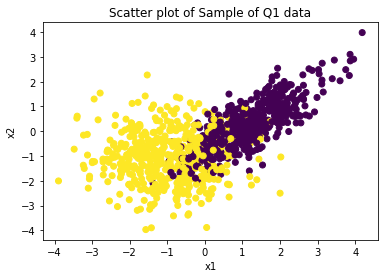

x1.max =  5.63447622225
x1.min =  -5.88643579272
x1.mean =  0.0485288630613
x1.std =  1.45240155547
x2.max =  5.31771819318
x2.min =  -5.35226469937
x2.mean =  -0.397106032362
x2.std =  1.16400934953


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

###############################################
# (E)
###############################################
print "(E)"
print "Note: We only plot a sample of the data here because this jupyter notebook runs very slowly when trying to plot 100k points on a scatter plot"
# open the data file for reading
f = open("./data/A3_Q1_data.csv")

# Get rid of the header line
f.readline()

# data = [ [x1 x2], [x1 x2], ...]
data = []
# labels = [ y, y, ... ]
labels = []

# Parse in the data from the file in to one big list of lists
for line in f:
    x1,x2,y = line.split(",")
    data.append([float(x1),float(x2)])
    labels.append(int(float(y.rstrip())))
#print "finished reading in file"
    
# Scatter plot the data read in
colors=['#FF0000', '#00FF00']
fig = plt.figure()
plt.scatter([x[0] for x in data[:1000]], [x[1] for x in data[:1000]], c=labels[:1000])
plt.title("Scatter plot of Sample of Q1 data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# x1 stats
print "x1.max = ",np.array([x[0] for x in data]).max()
print "x1.min = ",np.array([x[0] for x in data]).min()
print "x1.mean = ",np.array([x[0] for x in data]).mean()
print "x1.std = ",np.array([x[0] for x in data]).std()
# x2 stats
print "x2.max = ",np.array([x[1] for x in data]).max()
print "x2.min = ",np.array([x[1] for x in data]).min()
print "x2.mean = ",np.array([x[1] for x in data]).mean()
print "x2.std = ",np.array([x[1] for x in data]).std()

**(E)**

From the plot of the sample, the data do not appear to be entirely linearly separable, but a linear model may perform adequately. Logistic regression will be a good choice for these data because as mentioned previously, it appears a linear model will perform well on this two-class dataset and logistic regression is infact a linear model designed for binary classification. Since this is a classification problem, logistic regression is preferred over linear regression.

**(F)** 

After plotting a sample of the data and viewing the min, max, mean, and standard deviation of the entire dataset, it does not appear that there are missing values, scale differences, or any significant high leverage or outlier points. Therefore, no preprocessing was applied.

**IMPLEMENT GRADIENT DESCENT**

Note: All tests and analysis were done with training set = 30% and test set = 70% as I did this before the correction was made.

In [2]:
###############################################
# (G)
###############################################
#print "(G)"

def sigmoid(x):
    return 1./(1 + np.exp(-1*x))

def predict(weights, in_data):
    # Weights = [w0, w1, w2]
    # Data = [[x1,x2], [x1,x2], [x1,x2], ...]
    
    # Create list that will be returned
    predictions = []
    # For each of the observations in in_data
    for dat in in_data:
        # Calculate the inner product
        tsum = weights[0] + weights[1]*dat[0] + weights[2]*dat[1]
        # compute probability using sigmoid function
        pred = sigmoid(tsum)
        # append the prediction to the list
        predictions.append(pred)
    return predictions

###############################################
# (H)
###############################################
def compute_cost_fxn(weights, in_data, in_labels):
    # Weights = [w0, w1, w2]
    # Data = [[x1,x2], [x1,x2], [x1,x2], ...]
    # labels = [y, y, y, ...]
    
    # Step 1: Run the predict function to get the predictions for all data points
    predictions = predict(weights, in_data)
    
    assert(len(predictions) == len(in_data))
    
    # Step 2: Compute the loss given the predictions and the true labels
    # Note: The data and the predictions are index matched
    Cost = 0
    for i in range(len(predictions)):
        label_pt = in_labels[i]
        
        # If the true label is 1
        if(label_pt == 1):
            Cost += math.log(predictions[i])
        # If the true label is 0
        elif(label_pt == 0):
            Cost += np.log(1 - predictions[i])
        else:
            # Else, we have problems
            exit()
            
    # Negate the cost
    Cost *= -1
    
    return Cost


In [3]:
###############################################
# (I)
###############################################
# Split the data into training and testing sets
num_data = len(data)
num_train = int(.3*num_data)
train_data = data[:num_train]
train_labels = labels[:num_train]
test_data = data[num_train:]
test_labels = labels[num_train:]

print "num data: ",num_data
print "num train: ",len(train_data)
print "num test: ",len(test_data)

def train_model(train_data, train_labels, weight_list, lr, iters):
    # weight_list = [w0, w1, w2] = the initial weights that will be tuned in training
    # train_data = [[x1,x2], [x1,x2], ...]
    # train_labels = [y, y, ...]
    # lr = learning rate
    # iters = number of training iterations to perform
    
    # Return w: a history of the weights during training
    # the last entry in w is the best weight setup
    w = []
    
    wl = weight_list
    
    for i in range(iters):
        
        # Precompute predictions for all training data using these weights
        preds = predict(wl, train_data)
        
        # Calculate gradient of cost fxn w.r.t each weight
        # dC/dw0
        dC_dw0 = 0
        for j in range(len(preds)):
            dC_dw0 += (train_labels[j] - preds[j]) * 1.
            
        # dC/dw1
        dC_dw1 = 0
        for j in range(len(preds)):
            dC_dw1 += (train_labels[j] - preds[j]) * train_data[j][0]
          
        # dC/dw2
        dC_dw2 = 0
        for j in range(len(preds)):
            dC_dw2 += (train_labels[j] - preds[j]) * train_data[j][1]
          
        n_wl = [0,0,0]
        # Perform weight updates
        n_wl[0] = wl[0] + lr*dC_dw0
        n_wl[1] = wl[1] + lr*dC_dw1
        n_wl[2] = wl[2] + lr*dC_dw2
        
        #print compute_cost_fxn(weights, train_data, train_labels)
        #print weights
        
        w.append(n_wl)
        wl = n_wl
    
    return w

# Run training
init_weights = [0,0,0]
recorded_weights = train_model(train_data, train_labels, init_weights, .00001, 50)

best_weights = recorded_weights[-1]
print "Best weights: ",best_weights


num data:  100000
num train:  30000
num test:  70000
Best weights:  [-0.17644789399177049, -1.5397015628645787, -0.50912461315992075]


(J)


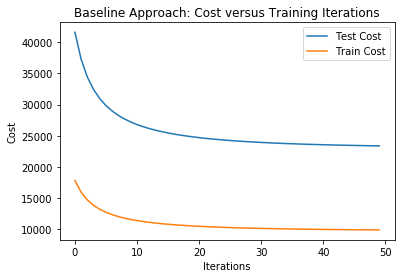

Lowest Train Cost:  9868.92285618
Lowest Test Cost:  23365.8004568


In [4]:
###############################################
# (J)
###############################################
# See how the cost changed as the weights were updated during training
train_cost_arr = []
test_cost_arr = []
for w in recorded_weights:
    # Calculate initial cost
    curr_train_cost = compute_cost_fxn(w, train_data, train_labels)
    curr_test_cost = compute_cost_fxn(w, test_data, test_labels)
    train_cost_arr.append(curr_train_cost)
    test_cost_arr.append(curr_test_cost)

print "(J)"
plt.plot(test_cost_arr,label='Test Cost')
plt.plot(train_cost_arr,label='Train Cost')
plt.legend()
plt.title("Baseline Approach: Cost versus Training Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
print "Lowest Train Cost: ",np.array(train_cost_arr).min()
print "Lowest Test Cost: ",np.array(test_cost_arr).min()


Weight Initializations all 1's


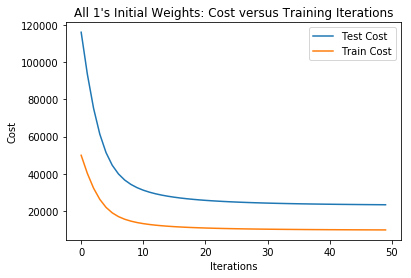

Lowest Train Cost:  9911.20036294
Lowest Test Cost:  23426.6396454


Random Initial Weights


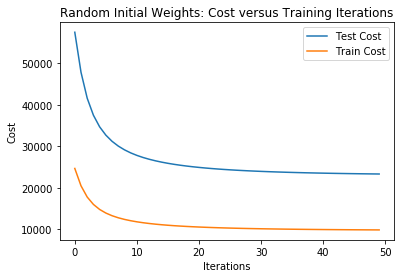

Lowest Train Cost:  9867.53731672
Lowest Test Cost:  23336.4149181


In [5]:
###############################################
# (K)
###############################################

###############################################
# Test 1: Different Weight initializations

#### Weights all 1's
print "Weight Initializations all 1's"
init_weights = [1,1,1]
recorded_weights = train_model(train_data, train_labels, init_weights, .00001, 50)

# See how the cost changed as the weights were updated during training
train_cost_arr = []
test_cost_arr = []
for w in recorded_weights:
    # Calculate initial cost
    curr_train_cost = compute_cost_fxn(w, train_data, train_labels)
    curr_test_cost = compute_cost_fxn(w, test_data, test_labels)
    train_cost_arr.append(curr_train_cost)
    test_cost_arr.append(curr_test_cost)

plt.plot(test_cost_arr,label='Test Cost')
plt.plot(train_cost_arr,label='Train Cost')
plt.legend()
plt.title("All 1's Initial Weights: Cost versus Training Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
print "Lowest Train Cost: ",np.array(train_cost_arr).min()
print "Lowest Test Cost: ",np.array(test_cost_arr).min()


#### Random initial weights
print "\n\nRandom Initial Weights"
init_weights = np.random.rand(3,1)
recorded_weights = train_model(train_data, train_labels, init_weights, .00001, 50)

# See how the cost changed as the weights were updated during training
train_cost_arr = []
test_cost_arr = []
for w in recorded_weights:
    # Calculate initial cost
    curr_train_cost = compute_cost_fxn(w, train_data, train_labels)
    curr_test_cost = compute_cost_fxn(w, test_data, test_labels)
    train_cost_arr.append(curr_train_cost)
    test_cost_arr.append(curr_test_cost)

plt.plot(test_cost_arr,label='Test Cost')
plt.plot(train_cost_arr,label='Train Cost')
plt.legend()
plt.title("Random Initial Weights: Cost versus Training Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
print "Lowest Train Cost: ",np.array(train_cost_arr).min()
print "Lowest Test Cost: ",np.array(test_cost_arr).min()

Test Learning Rate = .0001


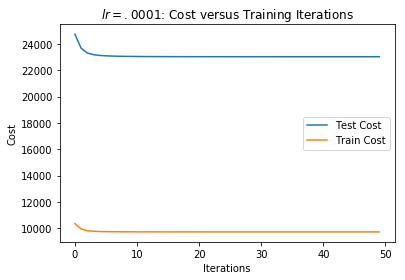

Lowest Train Cost:  9720.98757893
Lowest Test Cost:  23028.5377353


Test Learning Rate = .0000001


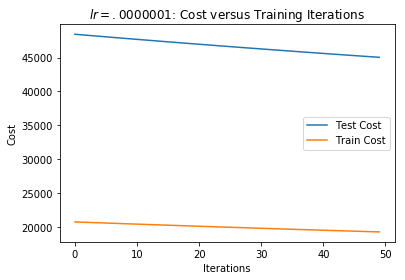

Lowest Train Cost:  19286.3336497
Lowest Test Cost:  45039.4487188


In [6]:
###############################################
# Test 2: Different Learning Rates

#### Learning Rate = .0001
print "Test Learning Rate = .0001"
init_weights = [0,0,0]
recorded_weights = train_model(train_data, train_labels, init_weights, .0001, 50)

# See how the cost changed as the weights were updated during training
train_cost_arr = []
test_cost_arr = []
for w in recorded_weights:
    # Calculate initial cost
    curr_train_cost = compute_cost_fxn(w, train_data, train_labels)
    curr_test_cost = compute_cost_fxn(w, test_data, test_labels)
    train_cost_arr.append(curr_train_cost)
    test_cost_arr.append(curr_test_cost)

plt.plot(test_cost_arr,label='Test Cost')
plt.plot(train_cost_arr,label='Train Cost')
plt.legend()
plt.title("$lr=.0001$: Cost versus Training Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
print "Lowest Train Cost: ",np.array(train_cost_arr).min()
print "Lowest Test Cost: ",np.array(test_cost_arr).min()

### Learning Rate = .0000001
print "\n\nTest Learning Rate = .0000001"
init_weights = [0,0,0]
recorded_weights = train_model(train_data, train_labels, init_weights, .0000001, 50)

# See how the cost changed as the weights were updated during training
train_cost_arr = []
test_cost_arr = []
for w in recorded_weights:
    # Calculate initial cost
    curr_train_cost = compute_cost_fxn(w, train_data, train_labels)
    curr_test_cost = compute_cost_fxn(w, test_data, test_labels)
    train_cost_arr.append(curr_train_cost)
    test_cost_arr.append(curr_test_cost)

plt.plot(test_cost_arr,label='Test Cost')
plt.plot(train_cost_arr,label='Train Cost')
plt.legend()
plt.title("$lr=.0000001$: Cost versus Training Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
print "Lowest Train Cost: ",np.array(train_cost_arr).min()
print "Lowest Test Cost: ",np.array(test_cost_arr).min()

Train Iters = 10


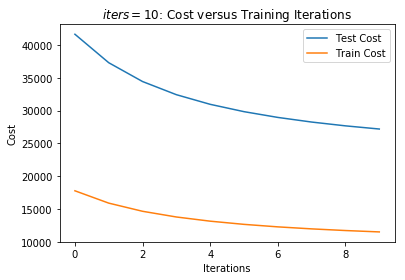

Lowest Train Cost:  11546.930288
Lowest Test Cost:  27199.4229911


Train Iters = 200


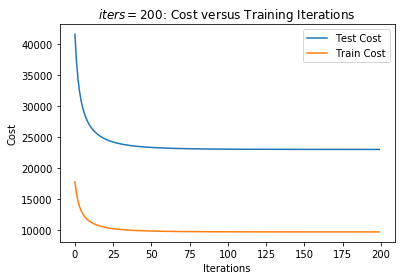

Lowest Train Cost:  9721.8186533
Lowest Test Cost:  23032.5048999


In [7]:
###############################################
# Test 3: Different Stopping Conditions

#### Train Iters: 10
print "Train Iters = 10"
init_weights = [0,0,0]
recorded_weights = train_model(train_data, train_labels, init_weights, .00001, 10)

# See how the cost changed as the weights were updated during training
train_cost_arr = []
test_cost_arr = []
for w in recorded_weights:
    # Calculate initial cost
    curr_train_cost = compute_cost_fxn(w, train_data, train_labels)
    curr_test_cost = compute_cost_fxn(w, test_data, test_labels)
    train_cost_arr.append(curr_train_cost)
    test_cost_arr.append(curr_test_cost)

plt.plot(test_cost_arr,label='Test Cost')
plt.plot(train_cost_arr,label='Train Cost')
plt.legend()
plt.title("$iters=10$: Cost versus Training Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
print "Lowest Train Cost: ",np.array(train_cost_arr).min()
print "Lowest Test Cost: ",np.array(test_cost_arr).min()

### Training Iterations: 200
print "\n\nTrain Iters = 200"
init_weights = [0,0,0]
recorded_weights = train_model(train_data, train_labels, init_weights, .00001, 200)

# See how the cost changed as the weights were updated during training
train_cost_arr = []
test_cost_arr = []
for w in recorded_weights:
    # Calculate initial cost
    curr_train_cost = compute_cost_fxn(w, train_data, train_labels)
    curr_test_cost = compute_cost_fxn(w, test_data, test_labels)
    train_cost_arr.append(curr_train_cost)
    test_cost_arr.append(curr_test_cost)

plt.plot(test_cost_arr,label='Test Cost')
plt.plot(train_cost_arr,label='Train Cost')
plt.legend()
plt.title("$iters=200$: Cost versus Training Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
print "Lowest Train Cost: ",np.array(train_cost_arr).min()
print "Lowest Test Cost: ",np.array(test_cost_arr).min()

**(K)** 

Show this process for different initializations, learning rates, and stopping criteria. What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why?

From the above experiments, we see that the different hyperparameters of the training algorithm have a large effect on the performance of the model. For all of the experiments, we use the algorithm described in section J as the baseline, which had $train\_iters=50$, $lr=.00001$, and weight initialization of $[0,0,0]$. This baseline approach achieved a final train and test costs of 9868.9 and 23365.8 respectively. Keep in mind, the goal of training is to minimize the cost so the lower the train and test costs, the better. In the following paragraphs, we will repeatedly compare the results to these baseline results.

In the first experiment we chose two different weight initializations to see how this changes the learning habits of the model. First, we initialized the weights to all 1's, keeping the other two parameters the same as the baseline and observed that the initial training and testing costs were much higher than the baseline. Also, we see that the best training and test costs were higher than the baseline, at 9911.2, 23426.6 respectively. Next, we choose a random weight distribution where the weights were sampled from a uniform distribution in interval $[0,1)$. In this experiment, we also see that the initial costs were higher than the baseline in both the training and testing, however, the best train and test costs were 9867.5, 23336.4. Notice, both the final train cost and the test cost are slightly **lower**.

The next experiment was to change the learning rate while keeping the weight initialization to zeros and the iterations to 50. First, we increased the learning rate to .0001 and observed that the cost more quickly converged. The best train and test cost for this run are 9720.9 and 23028.5, meaning this learning rate outperformed the baseline in both scores. Secondly, we decreased the learning rate by a factor of 100 to $lr=.0000001$ and saw that the model was converging much slower than the baseline. Over the 50 iterations, the model was only able to reach a train and test cost of 19286.3, 45039.4, which is considerably higher (worse) than the baseline.

The final experiment was to change the number of training iterations while keeping the same learning rate and weight initialization as the baseline. First, we set the number of iterations to 10 and observe that, while the costs were decreasing, the best costs of the run were higher than the baseline as we did not give the model enough time to train and converge. The best train and test costs are 11546.9, 27199.4, meaning the model was worse than the baseline. Secondly, we doubled the number of iterations to 200 and observed that the model performed better than the baseline as a result of the longer training period. The final train and test costs were 9721.8, 23032.5.

As a result of this section, we have a total of 7 variations of the model, one of which was used as a baseline to compare the other 6. From our weight initialization experiments, we see that both the 1's and random weight initialization lead to higher initial costs, and therefore lead to higher final costs as a result of the fixed number of iterations. From our learning rate experiments, we see that learning rate has a large impact on how quickly the model converges as a high learning rate will converge more quickly than a lower learning rate. Finally, from our training iteration experiments we see that as the number of iterations increases, the cost decreases as the model has more time to converge. The reason the baseline approach was chose was because it repersented a good tradeoff of cost to training time.

**TESTING MODEL PERFORMANCE**

(L)


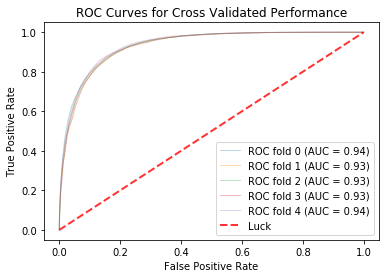

In [8]:
###############################################
# (L)
###############################################

from scipy import interp
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

X = data
y = labels

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

skf = StratifiedKFold(n_splits=5)

# For each split
for train_index, test_index in skf.split(X, y):
    # Extract the training/testing data and labels that will be used in this split
    X_train = [X[k] for k in train_index]
    X_test = [X[k] for k in test_index]
    y_train = [y[k] for k in train_index]
    y_test = [y[k] for k in test_index]
    
    # train the model with the train data from this split
    init_weights = [0,0,0]
    recorded_weights = train_model(X_train, y_train, init_weights, .00001, 20)
    
    # Using the most recent weights, make predictions on the test data for this split
    predictions = predict(recorded_weights[-1], X_test)

    # Compute ROC curve and area the curve
    # This involves comparing our predictions on the test data to their ground truth labels
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
    
print "(L)"
# Plot the ROC curves for the splits
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Cross Validated Performance')
plt.legend(loc="lower right")
plt.show()
    

**(M)**

We use cross-validation to approximate the test error rate we can expect when we deploy our model for testing. Since the test data is often not labeled, we use cross-validation to split our training set into splits, then test on one split which is held out from the training and train on the others. This hold-out dataset effectively acts as a test set from which we can approximate the test error.

(N)


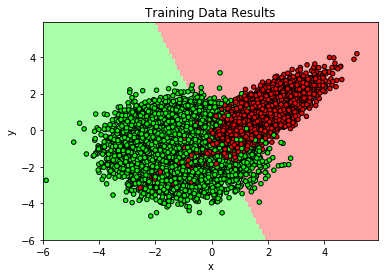

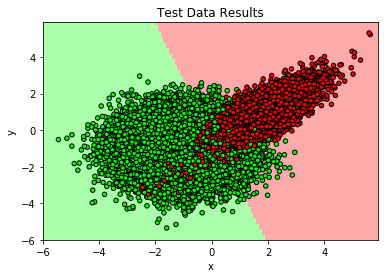

In [9]:
###############################################
# (N)
###############################################
print "(N)"
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])

# Define the meshgrid for the entire sample
# This will be used to display decision boundaries
h = .1 # step size in the mesh
x_min, x_max = -6, 6
y_min, y_max = -6, 6

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
data_mesh = np.array(predict(best_weights, np.c_[xx.ravel(), yy.ravel()]))
# Apply binary threshold to the mesh to create distince decision line
data_mesh[data_mesh < .5] = 0
data_mesh[data_mesh >= .5] = 1
data_mesh = data_mesh.reshape(xx.shape)

plt.pcolormesh(xx, yy, data_mesh,cmap=cmap_light)
plt.scatter([x[0] for x in train_data], [x[1] for x in train_data], c=train_labels,cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data Results")
plt.show()

plt.pcolormesh(xx, yy, data_mesh,cmap=cmap_light)
plt.scatter([x[0] for x in test_data], [x[1] for x in test_data], c=test_labels,cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data Results")
plt.show()

**(N)**

Note: In the above plots, the 'x' and 'y' axis represent the two features of the data and the color represents the class label.

From the above plots, we see that as shown on both the training and test data, the decision boundary appears to be a fair linear boundary between the two classes. There is significant overlap between the two classes around the (0,0) point which is where the loss in the model comes from as we are trying to separate non-linearly separable data with a line. The primary way we could improve this decision boundary would be to use a more flexible model capable of modeling a nonlinear decision boundary.

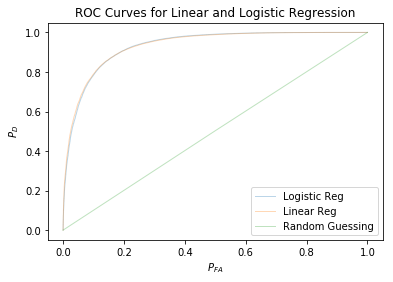

In [10]:
###############################################
# (O)
###############################################
from sklearn.metrics import roc_curve, auc
import sklearn.linear_model
# Predict with my model
my_model_preds = predict(best_weights,test_data)
my_model_preds[my_model_preds < .5] = 0
my_model_preds[my_model_preds >= .5] = 1
fpr, tpr, thresholds = roc_curve(test_labels, my_model_preds)
plt.plot(fpr, tpr, lw=1, alpha=0.3,label='Logistic Reg')

# Predict with linear regression
lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(train_data, train_labels)
lin_reg_preds = lin_reg.predict(test_data)
fpr, tpr, thresholds = roc_curve(test_labels, lin_reg_preds)
plt.plot(fpr, tpr, lw=1, alpha=0.3,label='Linear Reg')

# Predict with random guessing
random_preds = np.random.randint(2, size=len(lin_reg_preds))
fpr, tpr, thresholds = roc_curve(test_labels, random_preds)
plt.plot(fpr, tpr, lw=1, alpha=0.3,label='Random Guessing')


# ROC lucky guessing
#plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)

plt.title("ROC Curves for Linear and Logistic Regression")
plt.xlabel("$P_{FA}$")
plt.ylabel("$P_{D}$")
plt.legend()
plt.show()


**(O)**

From the plot we see two major trends, logistic and linear regression produce almost identical ROC curves, and random guessing produces a ROC curve as a straight line with slope 1. From this, we can gather that logistic regression and linear regression perform very similarly on this task, across all possible thresholds of classification. We also see that the random guessing strategy gives a probability of detection that equals the probability of false alarm for all threshold values which is the worst case scenario and yields the worst performance.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(e)** Using a linear model classifier (e.g. logistic regression) apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) Area Under the Curve (AUC). Describe the implications of your findings.

**ANSWER**

In [17]:
###############################################
# (A)
###############################################
import os
import glob
import skimage.io
import sklearn.linear_model
import random
import numpy as np
import struct

mnist_data_list = []
mnist_labels_list = []

# Inspired by https://gist.github.com/akesling/5358964
# Load everything in some numpy arrays
with open("./data/train-labels-idx1-ubyte", 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    lbl = np.fromfile(flbl, dtype=np.int8)

with open("./data/train-images-idx3-ubyte", 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

# Flatten the 28x28 images into 1x784
for i in img:
    mnist_data_list.append(i.flatten())
# Binarize the labels
for int_label in lbl:
    mnist_labels_list.append(1 if int_label == 3 else 0)
    
print "shape of data array: ",np.array(mnist_data_list).shape
print "shape of labels array: ",np.array(mnist_labels_list).shape
# Now, we have the mnist data and labels list all filled out
print "Done reading in train data"
print "Total number of images read in: ", len(mnist_labels_list)
print "Number of 3s:",mnist_labels_list.count(1)
print "Number of others:",len(mnist_labels_list)-mnist_labels_list.count(1)



shape of data array:  (60000, 784)
shape of labels array:  (60000,)
Done reading in train data
Total number of images read in:  60000
Number of 3s: 6131
Number of others: 53869


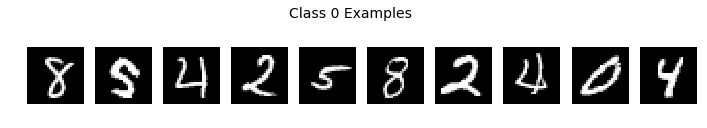

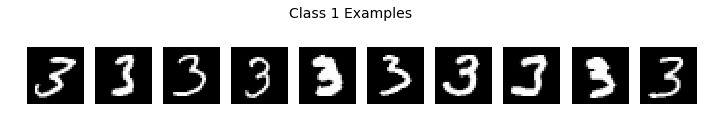

In [18]:
###############################################
# (B)
###############################################
# Plot 10 examples of each class
import matplotlib.pyplot as plt

# Shuffle the data so the 1's are not clustered
c = list(zip(mnist_data_list, mnist_labels_list))
random.shuffle(c)
mnist_data_list, mnist_labels_list = zip(*c)

# Find 10 indexes of each label in the labels list
c0_inds = np.where(np.array(mnist_labels_list) == 0)[0][:10]
c1_inds = np.where(np.array(mnist_labels_list) == 1)[0][:10]

# Plot the class 0 examples


plt.figure(figsize=(12, 2))
plt.suptitle("Class 0 Examples", fontsize=14)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis("off")
    plt.imshow(np.array(mnist_data_list[c0_inds[i]]).reshape((28,28)), cmap='gray')
    
# Plot the class 1 examples
plt.figure(figsize=(12, 2))
plt.suptitle("Class 1 Examples", fontsize=14)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis("off")
    plt.imshow(np.array(mnist_data_list[c1_inds[i]]).reshape((28,28)), cmap='gray')

plt.show()



**(C)**

From above there is a total of 60,000 images read in from the training set. Of this, there are 6,131 images of class three and the other 53,869 are not. For our purposes this means there are:

- 6,131 data points of class 1

- 53,869 data points of class 0

Thus, there is a considerable imbalance in the label distribution. This may lead to errors in the learning process as the model may not fit the target class well because it is overfitting to class 0.


In [19]:
def accuracy(y1, y2):
    assert(len(y1) ==  len(y2))
    total = len(y1)
    correct_cnt = 0
    for i in range(len(y1)):
        if y1[i] == y2[i]:
            correct_cnt += 1   
    print "Accuracy = ",(correct_cnt/float(total))
    

Accuracy =  0.960669944171
Accuracy =  0.96
Accuracy =  0.96175
Accuracy =  0.964583333333
Accuracy =  0.904908742395


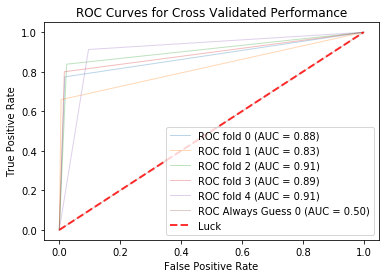

In [20]:
###############################################
# (D)
###############################################
from scipy import interp
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

X = mnist_data_list
y = mnist_labels_list

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

skf = StratifiedKFold(n_splits=5)

# For each split
for train_index, test_index in skf.split(X, y):
    # Extract the training/testing data and labels that will be used in this split
    X_train = [X[k] for k in train_index]
    X_test = [X[k] for k in test_index]
    y_train = [y[k] for k in train_index]
    y_test = [y[k] for k in test_index]

    # Create and fit a perceptron classifier
    perceptron = sklearn.linear_model.Perceptron()
    perceptron.fit(X_train, y_train)
    preds = perceptron.predict(X_test)

    accuracy(preds, y_test)
    
    # Compute ROC curve and area the curve
    # This involves comparing our predictions on the test data to their ground truth labels
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
    
    
# Compute the ROC curve for the always guess 0 case
fpr1, tpr1, thresholds1 = roc_curve(y, np.zeros(len(y)))
roc_auc1 = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, lw=1, alpha=0.3,label='ROC Always Guess 0 (AUC = %0.2f)' % (roc_auc1))
    
# Plot the ROC curves for the splits
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Cross Validated Performance')
plt.legend(loc="lower right")
plt.show()



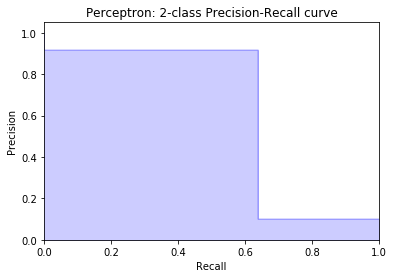

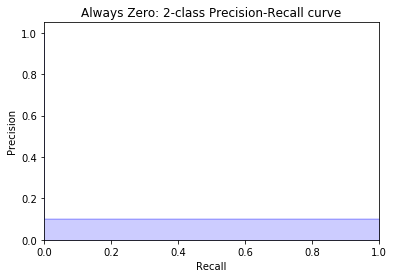

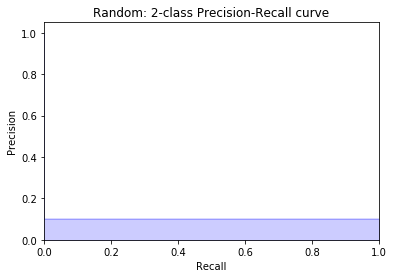

In [21]:
# Do precision recall curves for my classifier, random guesses, and always 0
skf = StratifiedKFold(n_splits=2)

# For each split
for train_index, test_index in skf.split(X, y):
    # Extract the training/testing data and labels that will be used in this split
    X_train = [X[k] for k in train_index]
    X_test = [X[k] for k in test_index]
    y_train = [y[k] for k in train_index]
    y_test = [y[k] for k in test_index]

    # Create and fit a perceptron classifier
    perceptron = sklearn.linear_model.Perceptron()
    perceptron.fit(X_train, y_train)
    
    # Run predictions with perceptron
    preds = perceptron.predict(X_test)

    # Always guess zero preds
    agz_preds = np.zeros(len(preds))
    
    # Random guessing preds
    random_preds = np.random.randint(2, size=len(preds))
    
    precision, recall, _ = precision_recall_curve(y_test, preds)
    plt.step(recall, precision, color='b', alpha=0.2,where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Perceptron: 2-class Precision-Recall curve')
    plt.show()
    
    precision, recall, _ = precision_recall_curve(y_test, agz_preds)
    plt.step(recall, precision, color='b', alpha=0.2,where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Always Zero: 2-class Precision-Recall curve')
    plt.show()
    
    precision, recall, _ = precision_recall_curve(y_test, random_preds)
    plt.step(recall, precision, color='b', alpha=0.2,where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Random: 2-class Precision-Recall curve')
    plt.show()
    break

**(D)**

The first result we see in this evaluation is the accuracy scores reported across the folds when creating the ROC curves. We see the accuracy is about 95% when testing the hold out fold, however, recall that we have a large class imbalance so we must look at the results in a different way. From the ROC curves across the folds we see that the average AUC is about .83, meaning that the classifier may not be as good as the accuracy results suggest. The ROC curves show that there are a fair amount of false alarms. The ROC curves also show that for all the folds, the probability of detection increased almost vertically for very small values of $P_{FA}$, then at a certain threshold the $P_{FA}$ increased rapidly while $P_{D}$ only changed slightly. This indicates that the effectiveness of the system is very sensitive to the threshold used. Also from these ROC curves we see that our model consistently outperforms the always guess 0 and luck strategies.

Recall, the PR curves are a good indicator of success even when the classes are imbalanced. In general, the greater the area under the curve the better precision and recall performance the model has. In the first PR curve, we plot the results of the Perceptron classifier, and see that the area under the curve is significant and therefore can conclude it has reasonable performance. However the PR curves for the random guessing and always guess zero have very little areas, indicating poor precision and recall performance.

C = 0.01
C = 0.5075
C = 1.005
C = 1.5025
C = 2.0


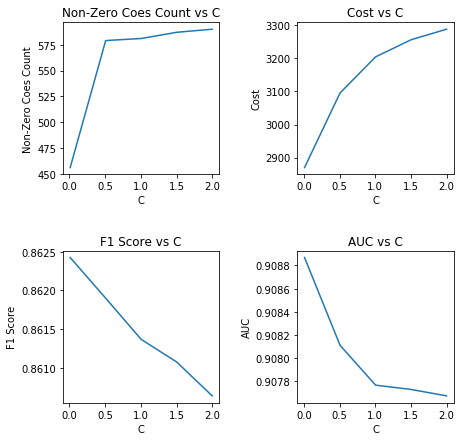

In [22]:
###############################################
# (E)
###############################################
from sklearn.metrics import f1_score

def compute_cost_fxn(predictions, in_labels):
   
    assert(len(predictions) == len(in_labels))
    
    # Step 2: Compute the loss given the predictions and the true labels
    # Note: The data and the predictions are index matched
    Cost = 0
    for i in range(len(predictions)):
        label_pt = in_labels[i]
        
        # If the true label is 1
        if(label_pt == 1):
            Cost += np.log(predictions[i])
        # If the true label is 0
        elif(label_pt == 0):
            Cost += np.log(1 - predictions[i])
        else:
            # Else, we have problems
            exit()
            
    # Negate the cost
    Cost *= -1
    
    return Cost

# TODO: sweep value of C
# As you vary the regularization coefficient, plot 
#(1) the number of model parameters that are estimated to be nonzero; 
#(2) the logistic regression cost function, which you created a function to evaluate in the Question 1; 
#(3)  F1F1 -score, and 
#(4) Area Under the Curve (AUC). Describe the implications of your findings.

# Split up the data into train and test splits for this section
X = mnist_data_list
y = mnist_labels_list
ntrain = int(.5*len(mnist_labels_list))
mnist_train_data = X[:ntrain]
mnist_train_labels = y[:ntrain]
mnist_test_data = X[ntrain:]
mnist_test_labels = y[ntrain:]


##### SWEEP HERE #####
num_nonzero = []
log_reg_cost = []
f1_scores = []
auc_vals = []

its = 5

for my_C in np.linspace(.01,2,its):
    print "C =",my_C
    # Create and fit a logistic regression classifier
    log_reg = sklearn.linear_model.LogisticRegression(penalty='l1',C=my_C)
    log_reg.fit(mnist_train_data, mnist_train_labels)
    preds = log_reg.predict_proba(mnist_test_data)
    #accuracy(preds, mnist_test_labels)
    bin_preds = log_reg.predict(mnist_test_data)

    # Count non-zero params
    nonzero_params = np.count_nonzero(log_reg.coef_)

    aucs = []
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)
    fpr, tpr, thresholds = roc_curve(mnist_test_labels, bin_preds)
    #tprs.append(interp(mean_fpr, fpr, tpr))
    #tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #print "roc auc: ",roc_auc

    num_nonzero.append(nonzero_params)
    log_reg_cost.append(compute_cost_fxn([x[1] for x in preds], mnist_test_labels))
    f1_scores.append(f1_score(mnist_test_labels, bin_preds))
    auc_vals.append(roc_auc)
    
#plt.figure(figsize=(10, 10))
fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(wspace=.5,hspace=.5)
#plt.tight_layout()
plt.subplot(2,2,1)
plt.title("Non-Zero Coes Count vs C")
plt.xlabel("C")
plt.ylabel("Non-Zero Coes Count")
plt.plot(np.linspace(.01,2,its),num_nonzero,label="non-0")

plt.subplot(2,2,2)
plt.title("Cost vs C")
plt.xlabel("C")
plt.ylabel("Cost")
plt.plot(np.linspace(.01,2,its),log_reg_cost,label="cost")

plt.subplot(2,2,3)
plt.title("F1 Score vs C")
plt.xlabel("C")
plt.ylabel("F1 Score")
plt.plot(np.linspace(.01,2,its),f1_scores,label="f1 score")

plt.subplot(2,2,4)
plt.title("AUC vs C")
plt.xlabel("C")
plt.ylabel("AUC")
plt.plot(np.linspace(.01,2,its),auc_vals,label="AUC")

plt.show()

**(E)**

It is important to note that C is the inverse of regularization strength, so smaller values specify stronger regularization.

In the above plots, we vary the value of C from .01 to 2 over 5 linearly spaced steps. In each of the plots we can see some very evident trends. In the first plot we see that the number of non-zero coefficients in the model **increases** as C increases. This intuitively makes sense because at low values of C, the regularization is very strong which tends to force all of the coes closer to zero. As C increases the regularization strength decreases and the coes are allowed to grow larger, hence more non-zero coes.

In the second plot, Cost vs C, we see that the Cost increases as the regularization strength decreases. This also makes sense as cost is a summation over the samples and considers the weights. If the weights are allowed to be larger and there are more non-zero weights, the cost values will increase.

The third plot shows the $F_1$ score versus C. Recall, $F_1$ score is a function of recall and precision and the higher the score, the better the model. From the plot we see as regularization strength decreases, the $F_1$ score decreases (but only marginally, .8625 vs .8610). Since regularization is a technique for improving generalization, this plot confirms that as we decrease the strength of the regularization, the model looses some generalization capability and the $F_1$ score as measured on the test set drops.

The last plot show the AUC versus C. The reason that AUC decreases as C increases is similar to the $F_1$ trend. As regularization gets weaker, the model does not generalize as well and the AUC curve decreases, incidating a less desirable model. However, this is also a marginal change as AUC only drops from .9088 to .9078.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performend, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to descrive this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

**(a)** 

One dataset that is of particular interest to me, in part due to my previous employment at the Air Force Research Laboratory (AFRL), is the Moving and Stationary Target Acquisition and Recognition (MSTAR) public release dataset (https://www.sdms.afrl.af.mil/index.php?collection=mstar&page=targets). The data was collected in 1995 by the Sandia National Laboratory's X-band synthetic aperture radar (SAR) sensor platform. During the collection, the SAR was configured in one foot resolution spotlight mode. The images in the public release dataset are in the form of .jpg images. The targets appear in the center of the images and the images have been cropped to contain one target per image. This implies that the original phase history information collected by the aperture was fully backprojected into large scale human-interpretable scenes, then each of the targets was cropped and saved separately. Below is an example of an image from the dataset. Also, for persepective photographs of the three target classes contained in the dataset are shown.

**Example SAR Image**
<img src="./data/HB03333.jpg">

**T72 Picture**
<img src="./data/t72_pic.jpg">

**BTR70 Picture**
<img src="./data/btr70_pic.jpg">

**BMP2 Picture**
<img src="./data/bmp2_pic.jpg">

This dataset is interesting because SAR data has some distinct advantages over standard photographic images, including that it can be collected in any weather conditions at any time of day or night. These properties make it quite useful when combined with arial vehicles (i.e. drones, planes, etc.). However, there has not been extensive study on the effectiveness of current machine learning algorithms on SAR data. For this reason, I would like to measure the performance of a relatively lightweight CNN classifier on this well defined MSTAR dataset. The ultimate goal of this study is to provide insight into whether or not combining CNNs with SAR imagery is possible, as the potential benefits are quite clear.

**(b)** 

The dataset can be found and downloaded from https://www.sdms.afrl.af.mil/index.php?collection=public-data&page=public-data-list. In particular, we will use the MSTAR Target Chips CD1 dataset. Unfortunately, the dataset comes in the form of Phoenix Header files, so before using the data, we must compile the mstar2jpeg conversion tool from the SDMS website then run it over all of the files. After doing that we have a directory structure containing all 128x128px grayscale jpg images as shown in the previous section. Note, converting all of the files is beyond the scope of this jupyter notebook as it involves changing some include files in the source code of the conversion tool and building the executable with a makefile. 

With the library built, the first step is to gather a list of all the jpgs in the dataset. Fortunately, the dataset has already been divided into 'TRAIN' and 'TEST' directories at the top level so we will create a train list of jpgs and a test list of jpgs (as txt files) using the following command.

```
find /Users/nathaninkawhich/DukeML/datasets/MSTAR_PUBLIC_TARGETS_CHIPS_T72_BMP2_BTR70_SLICY/TARGETS/TEST -name *.jpg > ../../../../../Documents/ECE590_Intro_ML/HW3/test_jpgs.txt
```

As a result of doing this for the train and test directories (separately) we will have two txt files named train_jpgs.txt and test_jpgs.txt that contain lists like this:

**Example of jpg list directory**

/path/to/MSTAR_PUBLIC_TARGETS_CHIPS_T72_BMP2_BTR70_SLICY/TARGETS/TRAIN/17_DEG/T72/SN_132/HB03893.jpg
/path/to/MSTAR_PUBLIC_TARGETS_CHIPS_T72_BMP2_BTR70_SLICY/TARGETS/TRAIN/17_DEG/T72/SN_132/HB03887.jpg
/path/to/MSTAR_PUBLIC_TARGETS_CHIPS_T72_BMP2_BTR70_SLICY/TARGETS/TRAIN/17_DEG/T72/SN_132/HB03878.jpg
/path/to/MSTAR_PUBLIC_TARGETS_CHIPS_T72_BMP2_BTR70_SLICY/TARGETS/TRAIN/17_DEG/T72/SN_132/HB03850.jpg

With these two text file based lists created, we can now begin to import the training data, format it for use with our classifier, and visualize it.

In [23]:
# Once you have converted all of the Phoenix header files to jpgs using the given tools, use the find command to 
#   get a list of all jpgs in the train directory, and a list of all jpgs in the test directory
# e.g. $ find /Users/nathaninkawhich/DukeML/datasets/MSTAR_PUBLIC_TARGETS_CHIPS_T72_BMP2_BTR70_SLICY/TARGETS/TEST 
#                  -name *.jpg > ../../../../../Documents/ECE590_Intro_ML/HW3/test_jpgs.txt

# Example of jpg list directory
#/path/to/MSTAR_PUBLIC_TARGETS_CHIPS_T72_BMP2_BTR70_SLICY/TARGETS/TRAIN/17_DEG/T72/SN_132/HB03893.jpg
#/path/to/MSTAR_PUBLIC_TARGETS_CHIPS_T72_BMP2_BTR70_SLICY/TARGETS/TRAIN/17_DEG/T72/SN_132/HB03887.jpg
#/path/to/MSTAR_PUBLIC_TARGETS_CHIPS_T72_BMP2_BTR70_SLICY/TARGETS/TRAIN/17_DEG/T72/SN_132/HB03878.jpg
#/path/to/MSTAR_PUBLIC_TARGETS_CHIPS_T72_BMP2_BTR70_SLICY/TARGETS/TRAIN/17_DEG/T72/SN_132/HB03850.jpg

import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import random

def crop_center(img, new_height, new_width):
    orig_height, orig_width = img.shape
    startx = (orig_width//2) - (new_width//2)
    starty = (orig_height//2) - (new_height//2)
    return img[starty:starty+new_height, startx:startx+new_width]


test_jpg_file = "./test_jpgs.txt"
train_jpg_file = "./train_jpgs.txt"

# Create the labels dictionary to decode english labels to int labels
labels = {"T72":0, "BTR70":1, "BMP2":2}

train_data = []
train_labels = []

ftrain = open(train_jpg_file, "r")

cnt = 0

for f in ftrain:

    # Extract the target name from the path
    english_name = f.split("/")[-3]
    lbl = labels[english_name]
    
    # Read in the image as a 128x128 grayscale
    img = skimage.io.imread(f.rstrip(),asgrey=True)
    # Convert to [0,1]
    img = img / 255.
    # Crop the center 64x64 pixels
    img = crop_center(img, 64,64)
    
    # Append the image to the train_data list
    train_data.append(img)
    train_labels.append(lbl)
    
# Shuffle the data so there are no clusters of labels
c = list(zip(train_data, train_labels))
random.shuffle(c)
train_data, train_labels = zip(*c)
    
print np.array(train_data).shape
print np.array(train_labels).shape
print np.array(train_data[0]).max()

#plt.imshow(train_data[0],cmap='gray')
#plt.axis("off")
#plt.show()

td = np.array(train_data)
td =  np.expand_dims(td,axis=1)
tl = np.array(train_labels,dtype=int)


print "Number of training samples: ",tl.shape
print "\tClass 0 Count (T72): ",np.count_nonzero(tl == 0)
print "\tClass 1 Count (BTR70): ",np.count_nonzero(tl == 1)
print "\tClass 2 Count (BMP2): ",np.count_nonzero(tl == 2)


(1622, 64, 64)
(1622,)
1.0
Number of training samples:  (1622,)
	Class 0 Count (T72):  691
	Class 1 Count (BTR70):  233
	Class 2 Count (BMP2):  698


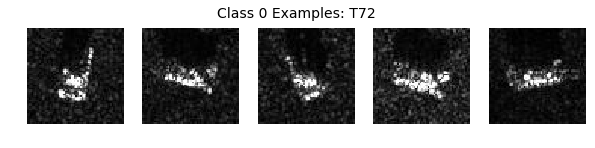

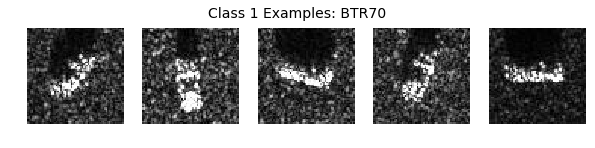

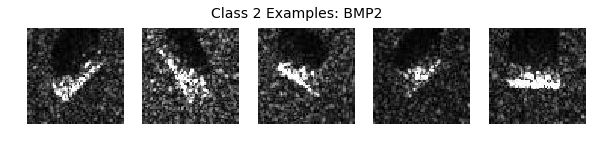

In [24]:
##############################################
# Visualize the data
##############################################
# Find 10 indexes of each label in the labels list
c0_inds = np.where(tl == 0)[0][:5]
c1_inds = np.where(tl == 1)[0][:5]
c2_inds = np.where(tl == 2)[0][:5]

#print td.shape

# Plot the class 0 examples
plt.figure(figsize=(10, 2))
plt.suptitle("Class 0 Examples: T72", fontsize=14)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.axis("off")
    plt.imshow(td[c0_inds[i],0], cmap='gray')
    
# Plot the class 1 examples
plt.figure(figsize=(10, 2))
plt.suptitle("Class 1 Examples: BTR70", fontsize=14)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.axis("off")
    plt.imshow(td[c1_inds[i],0], cmap='gray')
    
# Plot the class 1 examples
plt.figure(figsize=(10, 2))
plt.suptitle("Class 2 Examples: BMP2", fontsize=14)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.axis("off")
    plt.imshow(td[c2_inds[i],0], cmap='gray')
    
plt.show()

From above, we see that there are a totoal of 1622 training images comprised of 691 T72 chips, 233 BRT70 chips, and 698 BMP2 chips. Notice from the 128x128px example image from section (a) that the target is located in the center of the image and the target is relatively small. For this reason, and for computational complexity reasons, we will crop the center 64x64px out of each image. 

As is immediately evident from the class example plots the targets appear at different rotations and many of the distinctive features that a human would use to identify these targets are missing. The images are grayscale, and due to the limited precision/resolution of the SAR aperture used for collection and the backpropagation algorithm used to form the images, there is a lot of clutter and speckle noise. Now is where we see that a ML classifier would be helpful, as it would be difficult for a human to reliably classify these image chips. This is one of the primary motivations for this work!

**(c)**

In total, the dataset contains 3 target classes (T72, BTR70, and BMP2) each of which has been collected at two depression angles (15 and 17 degrees). We shall formally define the images as the 'predictors' or input features. The goal of this work is to design and train a **classifier** learns SAR target signatures of three classes and ultimately can be used for running inference on previously unseen test data. 

As mentioned, after download, the dataset must be converted into jpg images. The only preprocessing step we apply is to crop the center 64x64px from the images. Other than that, the data is clean, the targets are centered, and the chips all have similar distrubutions. It is evident that the creators of the dataset took care to clean and normalize the data before posting the dataset, and that is to our benefit.

**(d)**  

For this problem we will use a Convolutional Neural Network (CNN). CNNs have become very popular due to their performance on large image based classification tasks such as the ImageNet competition. This technique is especially effective when the input data is images, as the convolutional kernels in the model learn both the spatial features (i.e. edges, patterns, etc.) of the targets and other highly-abstract features of the images. Also, CNNs handle the extremely high input dimensionality of images very well. It is safe to say that CNNs have become one of the leading ML approaches when dealing with images, which is exactly the reason we will use them here.

**(e)** 

The performance of our classifier will primarily be conveyed through a confusion matrix and an accuracy score as reported on the test set. The confusion matrix will allow us to see potential trends in the models habits, including consistent errors, and accuracy (number of correct predictions divided by the total number of predictions made) which is a very understandable and concise way to convey the performance of a model. Note, it is very common for CNN model performance to be shown through accuracy measurements (or error which is 1-accuracy).

**(f)** 

In this work we will divide the data into a train set and a test set. The train set will be the SAR chips collected at 17 degree depression angles and the test set will be the 15 degree image chips. This is a reasonable approach as in reality it is not possible to collect and train a model on all possible angles for all given targets. Therefore, it would be useful to show that we can train on one angle and test on another angle as this is the more likely operational scenario. During training, we will use a batch size of 50, as that will provide more regular feedback of how the model is doing and since the data is shuffled beforehand, each batch should be a fair sampling of the total population. Here is the breakdown of the training and test data:

- Train (1622 images)
    - 691 T72 chips
    - 233 BRT70 chips
    - 698 BMP2 chips

- Test (1365 images)
	- 582 T72 chips
	- 196 BTR70 chips
	- 587 BMP2 chips
   
**(g)** 

Now, we will begin to run our analysis. First we will build and train the model, then we will bring in the test data and classify each of our test images, and finally we will review the results.

In [25]:
from caffe2.python import (
    brew,
    core,
    model_helper,
    net_drawer,
    optimizer,
    visualize,
    workspace,
)

# Set some variables for convenience
image_width = 64
image_height = 64
image_channels = 1
num_classes = 3

def update_dims(height, width, kernel, stride, pad):
    new_height = ((height - kernel + 2*pad)//stride) + 1
    new_width = ((width - kernel + 2*pad)//stride) + 1
    return new_height, new_width

# define model architecture in terms of layers
def AddCNNModel(model, data):
   
    conv1 = brew.conv(model, data, 'conv1', dim_in=image_channels, dim_out=32, kernel=5)
    h,w = update_dims(height=image_height, width=image_width, kernel=5, stride=1, pad=0)
    
    pool1 = brew.max_pool(model, conv1, 'pool1', kernel=2, stride=2)
    h,w = update_dims(height=h, width=w, kernel=2, stride=2, pad=0)
    relu1 = brew.relu(model, pool1, 'relu1')
    
    conv2 = brew.conv(model, relu1, 'conv2', dim_in=32, dim_out=64, kernel=5)
    h,w = update_dims(height=h, width=w, kernel=5, stride=1, pad=0)
    
    pool2 = brew.max_pool(model, conv2, 'pool2', kernel=2, stride=2)
    h,w = update_dims(height=h, width=w, kernel=2, stride=2, pad=0)
    relu2 = brew.relu(model, pool2, 'relu2')
    
    conv3 = brew.conv(model, relu2, 'conv3', dim_in=64, dim_out=64, kernel=5)
    h,w = update_dims(height=h, width=w, kernel=5, stride=1, pad=0)
    
    pool3 = brew.max_pool(model, conv3, 'pool3', kernel=2, stride=2)
    h,w = update_dims(height=h, width=w, kernel=2, stride=2, pad=0)
    relu3 = brew.relu(model, pool3, 'relu3')
    
    fc3 = brew.fc(model, relu3, 'fc3', dim_in=64 * h * w, dim_out=500)
    fc3 = brew.relu(model, fc3, fc3)
    pred = brew.fc(model, fc3, 'pred', 500, num_classes)
    softmax = brew.softmax(model, pred, 'softmax')
    return softmax

def AddTrainingOperators(model, softmax, label):
    xent = model.LabelCrossEntropy([softmax, label], 'xent')
    # compute the expected loss
    loss = model.AveragedLoss(xent, "loss")
    # track the accuracy of the model
    #AddAccuracy(model, softmax, label)
    # use the average loss we just computed to add gradient operators to the model
    model.AddGradientOperators([loss])
    optimizer.build_sgd(
        model,
        base_learning_rate=0.1,
        policy="step",
        stepsize=1,
        gamma=0.999,
    )

# CONSTRUCT THE CAFFE2 MODEL 
arg_scope = {"order": "NCHW"}
train_model = model_helper.ModelHelper(name="mstar_train", arg_scope=arg_scope)
softmax = AddCNNModel(train_model, 'data')
AddTrainingOperators(train_model,softmax,'label')
accuracy = train_model.Accuracy([softmax, 'label'], "accuracy")

########################################################################
# Run training procedure
########################################################################

dummy_d = np.zeros((1,1,64,64),dtype='float32')

# Prime the workspace with some data so we can run init net once
workspace.FeedBlob("data", dummy_d)
workspace.FeedBlob("label", np.array([0]).astype(int))

# The parameter initialization network only needs to be run once.
workspace.RunNetOnce(train_model.param_init_net)
workspace.CreateNet(train_model.net, overwrite=True)

bsize = 100
epochs = 20

# Integer number of batches that we have given this batch size
num_batches = len(tl) // bsize

# variables to track the accuracy & loss
accuracy = []
loss = []

for j in range(epochs):
    for i in range(num_batches):
        # Split the data into the batch
        curr_dat = td[bsize*i:bsize*i+bsize]
        curr_lab = tl[bsize*i:bsize*i+bsize]

        workspace.FeedBlob("data", curr_dat.astype(np.float32))
        workspace.FeedBlob("label", curr_lab.astype(np.int32))
        workspace.RunNet(train_model.net)
        accuracy.append(workspace.FetchBlob('accuracy'))
        loss.append(workspace.FetchBlob('loss'))
        print "Epoch: {}, Batch: {}/{}, accuracy = {}".format(j,i,num_batches,accuracy[-1])


Epoch: 0, Batch: 0/16, accuracy = 0.170000001788
Epoch: 0, Batch: 1/16, accuracy = 0.379999995232
Epoch: 0, Batch: 2/16, accuracy = 0.430000007153
Epoch: 0, Batch: 3/16, accuracy = 0.389999985695
Epoch: 0, Batch: 4/16, accuracy = 0.389999985695
Epoch: 0, Batch: 5/16, accuracy = 0.439999997616
Epoch: 0, Batch: 6/16, accuracy = 0.649999976158
Epoch: 0, Batch: 7/16, accuracy = 0.389999985695
Epoch: 0, Batch: 8/16, accuracy = 0.34999999404
Epoch: 0, Batch: 9/16, accuracy = 0.680000007153
Epoch: 0, Batch: 10/16, accuracy = 0.490000009537
Epoch: 0, Batch: 11/16, accuracy = 0.560000002384
Epoch: 0, Batch: 12/16, accuracy = 0.419999986887
Epoch: 0, Batch: 13/16, accuracy = 0.34999999404
Epoch: 0, Batch: 14/16, accuracy = 0.509999990463
Epoch: 0, Batch: 15/16, accuracy = 0.40000000596
Epoch: 1, Batch: 0/16, accuracy = 0.660000026226
Epoch: 1, Batch: 1/16, accuracy = 0.629999995232
Epoch: 1, Batch: 2/16, accuracy = 0.40000000596
Epoch: 1, Batch: 3/16, accuracy = 0.389999985695
Epoch: 1, Batch: 4

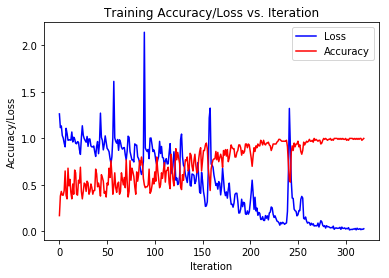

In [26]:
# After the execution is done, let's plot the values.
plt.plot(loss, 'b')
plt.plot(accuracy, 'r')
plt.legend(('Loss', 'Accuracy'), loc='upper right')
plt.title("Training Accuracy/Loss vs. Iteration")
plt.xlabel("Iteration")
plt.ylabel("Accuracy/Loss")
plt.show()

In [27]:
##############################################
# Parse in the test set
##############################################
test_data = []
test_labels = []
ftest = open(test_jpg_file, "r")
cnt = 0
for f in ftest:
    # Extract the target name from the path
    english_name = f.split("/")[-3]
    lbl = labels[english_name]
    # Read in the image as a 128x128 grayscale
    img = skimage.io.imread(f.rstrip(),asgrey=True)
    # Convert to [0,1]
    img = img / 255.
    # Crop the center 64x64 pixels
    img = crop_center(img, 64,64)
    # Append the image to the test_data list
    test_data.append(img)
    test_labels.append(lbl)
    
tstd = np.array(test_data)
tstd =  np.expand_dims(tstd,axis=1)
tstl = np.array(test_labels,dtype=int)

print tstd.shape
print tstl.shape

print "Number of testing samples: ",tstl.shape
print "\tClass 0 Count (T72): ",np.count_nonzero(tstl == 0)
print "\tClass 1 Count (BTR70): ",np.count_nonzero(tstl == 1)
print "\tClass 2 Count (BMP2): ",np.count_nonzero(tstl == 2)

(1365, 1, 64, 64)
(1365,)
Number of testing samples:  (1365,)
	Class 0 Count (T72):  582
	Class 1 Count (BTR70):  196
	Class 2 Count (BMP2):  587


In [28]:
##############################################
# Prepare a model for testing, then run it
##############################################
# CONSTRUCT THE CAFFE2 TEST MODEL 
arg_scope = {"order": "NCHW"}
test_model = model_helper.ModelHelper(name="mstar_test", arg_scope=arg_scope, init_params=False)
softmax = AddCNNModel(test_model, 'data')
accuracy = test_model.Accuracy([softmax, 'label'], "accuracy")

# Prime the workspace with some data so we can run init net once
dummy_d = np.zeros((1,1,64,64),dtype='float32')
workspace.FeedBlob("data", dummy_d)
workspace.FeedBlob("label", np.array([0]).astype(int))

# The parameter initialization network only needs to be run once.
workspace.RunNetOnce(test_model.param_init_net)
workspace.CreateNet(test_model.net)

# Put the test data in the workspace and run the test net
workspace.FeedBlob("data", tstd.astype(np.float32))
workspace.FeedBlob("label", tstl.astype(np.int32))
workspace.RunNet(test_model.net)
acc = workspace.FetchBlob('accuracy')
softmax = workspace.FetchBlob('softmax')
print "accuracy = {}".format(acc)


accuracy = 0.97948718071


In [29]:
import operator
# Softmax contains a list of softmax scores for each test sample that was pushed through
# softmax.shape = 1365,3

# Recall, actual labels for test data stored in tstl

cnn_preds = []

# Create a list of class predictions from the softmax list
for i in range(len(softmax)):
    # Get the softmax scores for this example
    s = softmax[i]
    # Find the index of the highest value.
    # i.e. declare the prediction as the class with the highest probability
    # max_index = class prediction, max_value = confidence of prediction
    max_index, max_value = max(enumerate(s), key=operator.itemgetter(1))
    cnn_preds.append(max_index)

assert(len(cnn_preds) == len(tstl))

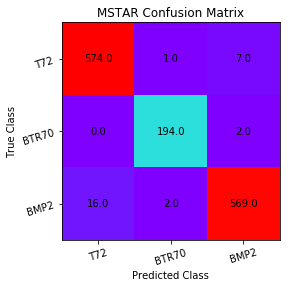

In [30]:
# Create the confusion matrix by comparing the predictions to the true labels
confusion_matrix = np.zeros((3,3))    
true_lbl = tstl[i]

for i in range(len(tstl)):
    confusion_matrix[tstl[i],cnn_preds[i]] += 1

# Plot confusion matrix
fig = plt.figure()
plt.tight_layout()
ax = fig.add_subplot(111)
res = ax.imshow(confusion_matrix, cmap=plt.cm.rainbow,interpolation='nearest')

width, height = confusion_matrix.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(confusion_matrix[x,y]), xy=(y, x),horizontalalignment='center',verticalalignment='center')

#cb = fig.colorbar(res)
classes = ['T72', 'BTR70', 'BMP2']
plt.xticks(range(width), classes, rotation=17)
plt.yticks(range(height), classes, rotation=17)
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
plt.title('MSTAR Confusion Matrix')
plt.show()


**(h)**

At this point, we have trained a model for 20 epochs, tested it on unseen data, and displayed a confusion matrix of the results. The first point to cover is the accuracy and loss plot displayed after the training was complete. From the plot, we can see that although the train accuracy is by no means a smooth curve, it converged to almost 100%. Also, since loss and accuracy are related, the train loss followed the same trend except it converged to around 0. This plot is positive because it suggests that our model learned the training data, but we still need to measure how the model performs on unseen test data. 

After training, we bring in the test data and format it in the same 64x64px grayscale form. When we run the testing, we see that the accuracy on the unseen test data was **97.94%,** which is awesome! This indicates that the model did not overfit the training data. To further explain the results we plot the confusion matrix for the test. On the horizontal axis we have the predicted class and on the vertical we have the acutal class. Intuitively, we would expect that the diagonal cells of this matrix would contain most of the guesses which they do. No one class is responsible for the majority of the errors and of all the 1365 test images, only 28 were misclassified!

*(Note, since we are not training for long and the weights are internally randomly initialized by Caffe2, rerunning the training may result in different values for this test accuracy, however it should not be too different)* 

Although the training and testing results were good, there may be some room for improvement. One obvious way would be to change the model architecture. We could add/remove filters from the convolutional layers, we could add entire convolutional layers, we could add more fully connected layers, or we could adopt a different architecture all together. Overall, this model refinement is a type of artform as we do not want an unnecessarily large model but we also do not want a model that is too small and cannot model the relevant features of the target classes.

Another area for improvement would be to change the parameters of the stochastic gradient descent algorithm. We could change the learning rate, the schedule at which the learning rate decays (gamma), or the momentum value. We could also use a different optimization algorithm all together such as the Adam optimizer. Along this same thought path, we could also change the number of training iterations.

**(i)** 

This project is an experiment to see how effective machine learning models are at learning targets from Synthetic Aperture Radar (SAR) data. The data used is from the MSTAR public release dataset and represents three target classes, including T72, BTR70, and BMP2. Since the data is in image form, we use a Convolutional Neural Network (CNN) for classification. The model is trained on the 17 degree depression angle collections of the three target classes and tested on the 15 degree depression angle images, representing a realistic operational condition. Overall, our model achieves an accuracy of 97.94% on the test set, providing evidence that training machine learning models on SAR data is feasible, and better yet effective!



